In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-data-winconsin-original/breast_cancer.csv


In [2]:
df = pd.read_csv("/kaggle/input/breast-cancer-data-winconsin-original/breast_cancer.csv")
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [4]:
df.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [5]:
df.duplicated().sum()

8

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

0

In [8]:
if 'Class' in df.columns:
    X = df.drop(columns='Class')
    y = df['Class']
else:
    X = df.copy()
    y = None

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
X_scaled.shape

(675, 10)

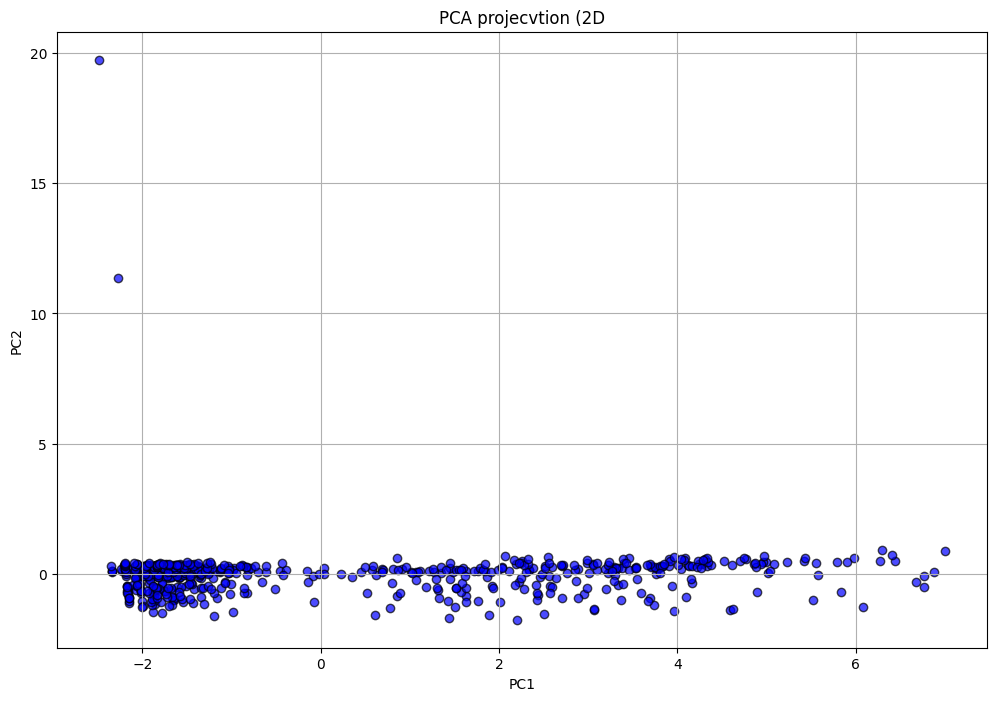

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12,8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', edgecolor='k', alpha=0.7)
plt.title("PCA projecvtion (2D")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

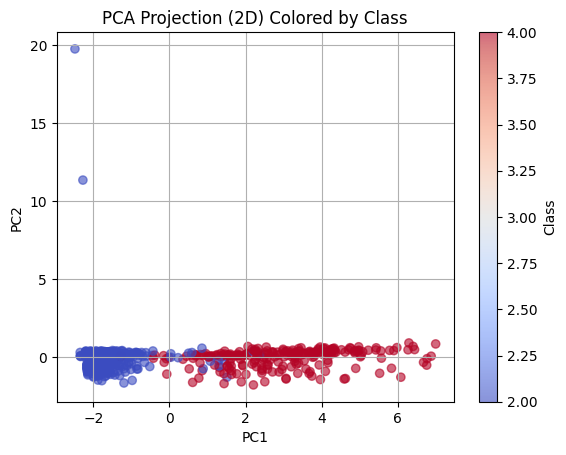

In [12]:

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.6)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection (2D) Colored by Class")
plt.colorbar(label='Class')
plt.grid(True)
plt.show()


In [13]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

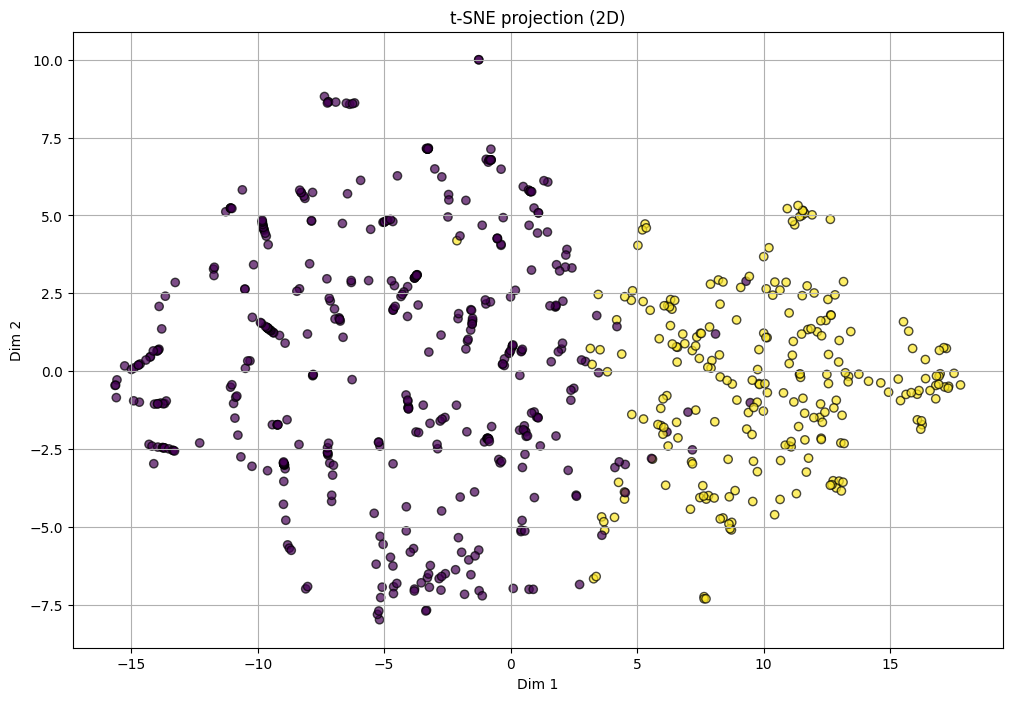

In [14]:
plt.figure(figsize=(12,8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, edgecolor='k', alpha=0.7)
plt.title('t-SNE projection (2D)')
plt.xlabel('Dim 1')
plt.ylabel("Dim 2")
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


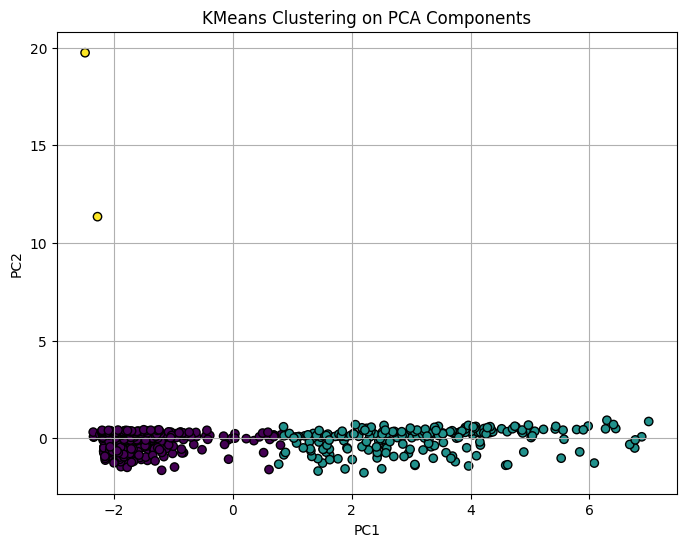

In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42) 
clusters = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', edgecolor='k')
plt.title("KMeans Clustering on PCA Components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


## Supervised learning

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


clf = RandomForestClassifier()
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           2       0.93      1.00      0.96        80
           4       1.00      0.89      0.94        55

    accuracy                           0.96       135
   macro avg       0.97      0.95      0.95       135
weighted avg       0.96      0.96      0.96       135



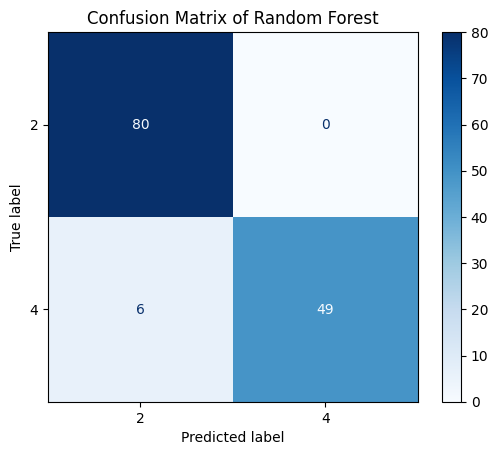

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix of Random Forest")
plt.grid(False)
plt.show()


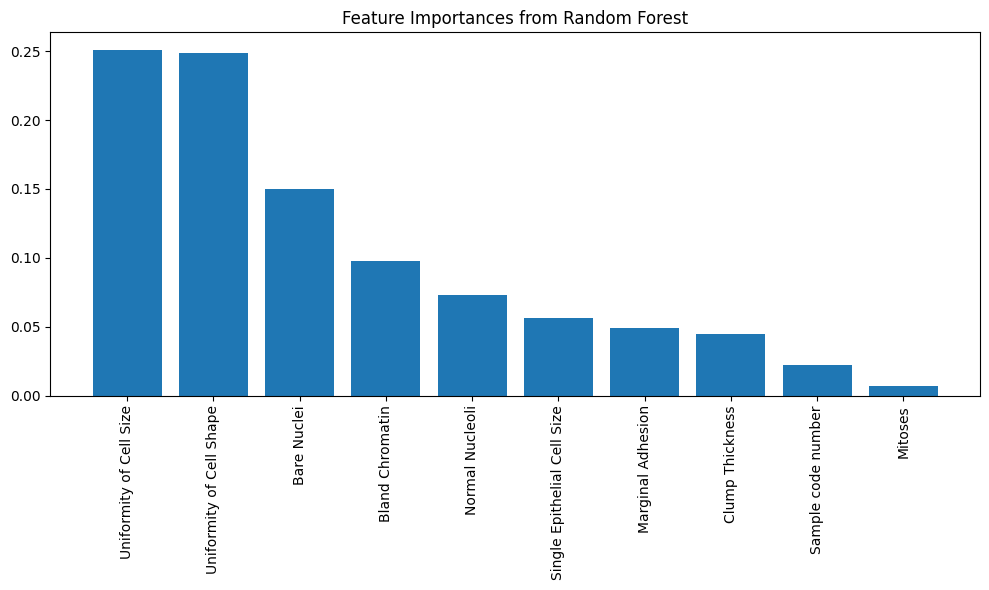

In [18]:

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns if hasattr(X, 'columns') else [f'Feature {i}' for i in range(X.shape[1])]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(feature_names)[indices], rotation=90)
plt.title("Feature Importances from Random Forest")
plt.tight_layout()
plt.show()


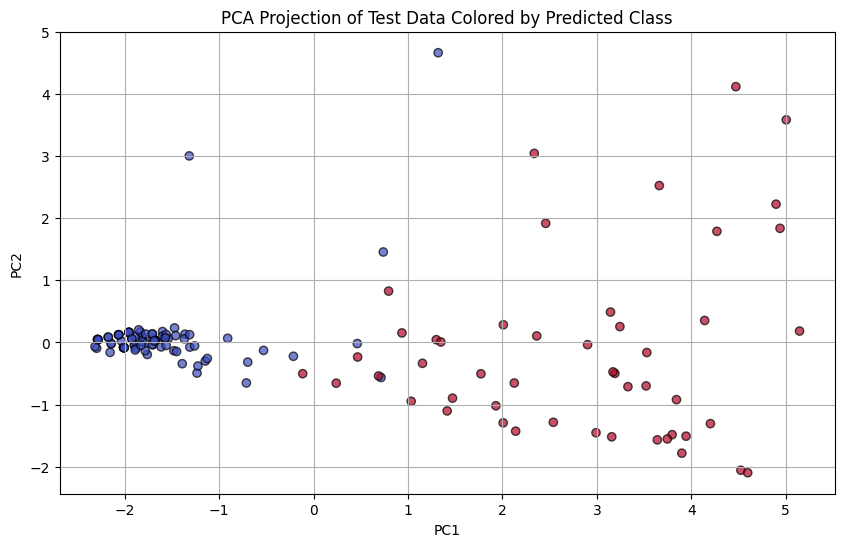

In [19]:

pca = PCA(n_components=2)
X_vis = pca.fit_transform(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_pred, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.title("PCA Projection of Test Data Colored by Predicted Class")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


In [20]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns if hasattr(X, 'columns') else [f'Feature_{i}' for i in range(X_scaled.shape[1])])
y_df = pd.DataFrame(y, columns=['Class'])


processed_df = pd.concat([X_scaled_df, y_df], axis=1)

processed_df.to_csv("processed_breast_cancer_data.csv", index=False)


In [21]:
X_train_df = pd.DataFrame(X_train, columns=X.columns if hasattr(X, 'columns') else [f'Feature_{i}' for i in range(X_train.shape[1])])
X_test_df = pd.DataFrame(X_test, columns=X.columns if hasattr(X, 'columns') else [f'Feature_{i}' for i in range(X_test.shape[1])])
y_train_df = pd.DataFrame(y_train, columns=['Class'])
y_test_df = pd.DataFrame(y_test, columns=['Class'])

# Save each part
X_train_df.to_csv("X_train.csv", index=False)
X_test_df.to_csv("X_test.csv", index=False)
y_train_df.to_csv("y_train.csv", index=False)
y_test_df.to_csv("y_test.csv", index=False)


In [22]:
y_pred_df = pd.DataFrame(y_pred, columns=['Predicted_Class'])
y_test_df = y_test_df.reset_index(drop=True)  # Ensure same index
results_df = pd.concat([y_test_df, y_pred_df], axis=1)

results_df.to_csv("test_predictions.csv", index=False)
